# Convolutional Neural Network using Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image # used for loading images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers. normalization import BatchNormalization

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
os.chdir('/home/yl2vq/PROJECT/met/logan/')
data = pd.read_csv('trainset.csv',encoding='utf=8')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,13,14,15,22,23,24,33,34,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
"""
#DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'
DIR = '/home/yl2vq/PROJECT/met/DATA/kerascul'
# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_dataframe():
    heights = []
    widths = []
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        data = np.array(Image.open(path))
        heights.append(data.shape[0])
        widths.append(data.shape[1])
    
    result = pd.DataFrame({'heights':heights,'widths':widths})
    return result
sizes = get_size_dataframe()
print('Average Height: {}'.format(np.mean(sizes['heights'])))
# print('\n')
print('Average Widths: {}'.format(np.mean(sizes['widths'])))
"""

"\n#DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'\nDIR = '/home/yl2vq/PROJECT/met/DATA/kerascul'\n# Want to know how we should format the height x width image data dimensions\n# for inputting to a keras model\ndef get_size_dataframe():\n    heights = []\n    widths = []\n    for img in os.listdir(DIR):\n        path = os.path.join(DIR, img)\n        data = np.array(Image.open(path))\n        heights.append(data.shape[0])\n        widths.append(data.shape[1])\n    \n    result = pd.DataFrame({'heights':heights,'widths':widths})\n    return result\nsizes = get_size_dataframe()\nprint('Average Height: {}'.format(np.mean(sizes['heights'])))\n# print('\n')\nprint('Average Widths: {}'.format(np.mean(sizes['widths'])))\n"

## 1. Loading train and test dataset 

### - One-hot encoding 

In [2]:
def label_img(name):
    word_label = name.split('_')[0]
    if word_label == 'men': return np.array([1, 0, 0, 0])
    elif word_label == 'women': return np.array([0, 1, 0, 0])
    elif word_label == 'flowers': return np.array([0,0,1,0])
    elif word_label == 'birds': return np.array([0,0,0,1])

In [3]:
IMG_SIZE = 224

#DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'
#TEST_DIR = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'

DIR = '/home/yl2vq/PROJECT/met/DATA/kerascul/train'
TEST_DIR = '/home/yl2vq/PROJECT/met/DATA/kerascul/test'

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        
        img = Image.open(path)
        img = img.convert('L') # convert to Grayscale
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) # resize image and aliasing when representing a high-resolution image at a lower resolution
        train_data.append([np.array(img), label])
            
    random.shuffle(train_data)
    return train_data

def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])
    random.shuffle(test_data)
    return test_data

In [5]:
train_data = load_training_data()

In [11]:
train_data[1][0]

array([[[230, 212, 176],
        [232, 214, 178],
        [231, 213, 177],
        ...,
        [222, 204, 168],
        [221, 203, 167],
        [218, 200, 164]],

       [[234, 216, 180],
        [232, 214, 178],
        [233, 215, 179],
        ...,
        [216, 198, 162],
        [214, 196, 160],
        [213, 195, 159]],

       [[233, 215, 179],
        [232, 214, 178],
        [235, 217, 181],
        ...,
        [215, 197, 161],
        [217, 199, 163],
        [212, 194, 158]],

       ...,

       [[235, 215, 180],
        [233, 214, 178],
        [235, 215, 180],
        ...,
        [215, 198, 156],
        [221, 201, 157],
        [221, 201, 163]],

       [[234, 214, 179],
        [229, 209, 174],
        [232, 212, 177],
        ...,
        [222, 204, 164],
        [221, 202, 164],
        [221, 202, 164]],

       [[238, 218, 183],
        [234, 214, 179],
        [233, 213, 178],
        ...,
        [223, 203, 168],
        [221, 201, 168],
        [223, 204, 167]]

### - Sample from training

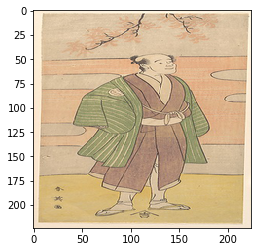

In [7]:
# Check see if it resized and loaded correctly
plt.imshow(train_data[2][0])
plt.show()

### - Sample from testing

In [12]:
test_data = load_test_data()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


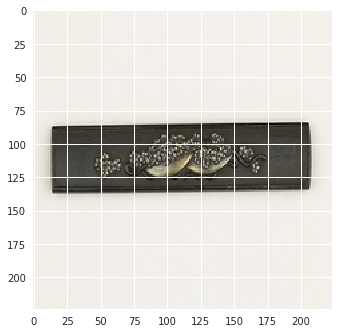

In [33]:
plt.imshow(test_data[1][0])
plt.show()

### - Convert Images to array

In [13]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

ValueError: could not broadcast input array from shape (224,224,3) into shape (224,224)

In [ ]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

In [ ]:
# Convert RGB

In [48]:
[np.zeros((224,224,3)).astype(object), np.zeros((224,224,3)).astype(object), np.zeros((224,224,13)).astype(object)]

[array([[[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0]],
 
        [[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0]],
 
        [[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0]],
 
        ...,
 
        [[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0]],
 
        [[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0]],
 
        [[0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0],
  

In [ ]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [ ]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

## 2. Implementing CNN

### - CNN with customized layers

In [25]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1),padding='same')) # grey scale
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

### - Compile with loss and optimizer using Accuracy as metrics

In [26]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

### - Fit the CNN

In [27]:
early_stopping = EarlyStopping() # Callback function

hist = model.fit(trainImages, trainLabels, 
          batch_size = 50, 
          validation_split=0.2, 
          epochs = 10,
          #callbacks=[early_stopping],
          verbose = 1)

Train on 4799 samples, validate on 1200 samples
Epoch 1/10
4799/4799 [==============================] - 235s 49ms/step - loss: 1.4866 - acc: 0.3845 - val_loss: 1.3103 - val_acc: 0.4092
Epoch 2/10
4799/4799 [==============================] - 234s 49ms/step - loss: 1.2431 - acc: 0.4516 - val_loss: 1.2174 - val_acc: 0.4658
Epoch 3/10
4799/4799 [==============================] - 233s 49ms/step - loss: 1.1646 - acc: 0.4874 - val_loss: 1.1117 - val_acc: 0.5067
Epoch 4/10
4799/4799 [==============================] - 234s 49ms/step - loss: 1.1230 - acc: 0.5151 - val_loss: 1.1292 - val_acc: 0.5067
Epoch 5/10
4799/4799 [==============================] - 233s 49ms/step - loss: 1.0855 - acc: 0.5334 - val_loss: 1.0943 - val_acc: 0.5308
Epoch 6/10
4799/4799 [==============================] - 233s 49ms/step - loss: 1.0710 - acc: 0.5424 - val_loss: 1.0894 - val_acc: 0.5408
Epoch 7/10
4799/4799 [==============================] - 233s 49ms/step - loss: 1.0124 - acc: 0.5672 - val_loss: 1.1889 - val_acc: 

### - Plots the loss and accuracy

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


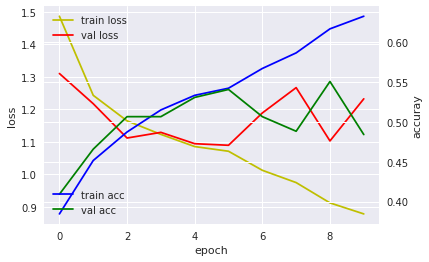

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### - Evaluation of CNN

In [33]:
loss, acc = model.evaluate(testImages, testLabels, verbose = 1)
print('Accuracy: %s '%(acc* 100),'%')

669/669 [==============================] - 8s 13ms/step
Accuracy: 44.8430493228995  %


## 3. Resnet-50

In [36]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


### - Sampled from traindata and predicted with Resnet model

In [83]:
os.listdir(DIR)[3]

'women_207565.jpg'

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


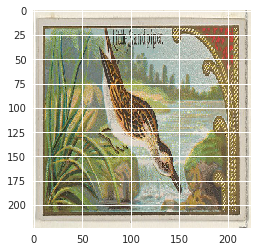

Predicted: [('n07248320', 'book_jacket', 0.7728213), ('n04476259', 'tray', 0.07363226), ('n04589890', 'window_screen', 0.059522357)]


In [80]:
img = image.load_img('/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train/birds_407954.jpg', target_size = (224, 224))
img_array = image.img_to_array(img)
img_expanded = np.expand_dims(img_array, axis = 0)
img_ready = preprocess_input(img_expanded)
plt.imshow(img)
plt.show()

preds = model.predict(img_ready)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


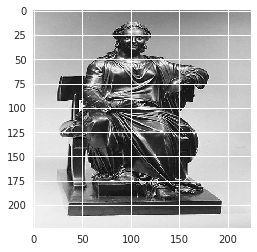

Predicted: [('n03146219', 'cuirass', 0.4529593), ('n03903868', 'pedestal', 0.16417336), ('n02895154', 'breastplate', 0.09925393)]


In [84]:
img = image.load_img('/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train/women_207565.jpg', target_size = (224, 224))
img_array = image.img_to_array(img)
img_expanded = np.expand_dims(img_array, axis = 0)
img_ready = preprocess_input(img_expanded)
plt.imshow(img)
plt.show()

preds = model.predict(img_ready)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

input = Input(shape=(224, 224, 3))
model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')

x = model.output
x = Dense(1024, name='fully', init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(3, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
model.summary()

train_datagen = ImageDataGenerator(rescale=1./255)#rgb값 reduce
train_generator = train_datagen.flow_from_directory(
        '/home/yl2vq/PROJECT/met/DATA/Pytorch/train',
        target_size=(224, 224),
        batch_size=30,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/home/yl2vq/PROJECT/met/DATA/Pytorch/valid',
        target_size=(224, 224),
        batch_size=30,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=2e-4),
                  optimizer=optimizers.adam(),
                  metrics=['acc'])

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[3].get_weights()))
early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_loss')
history = model.fit_generator(train_data,
                              steps_per_epoch=25,
                              epochs=100,
                              validation_data=test_data,
                              validation_steps=5,
                              callbacks=[early_stopping, print_weights])

#모델 평가
print("-- Evaluate --")
scores = model.evaluate_generator(val_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [1]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

input = Input(shape=(-1,224, 224, 3))
model = ResNet50(input_tensor=input, include_top=False, weights='imagenet', pooling='max')

x = model.output
x = Dense(1024, name='fully', init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(4, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
# model.summary()



model.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=2e-4),
                  optimizer=optimizers.adam(),
                  metrics=['acc'])


hist = model.fit(trainImages, trainLabels, 
          batch_size = 50, 
          validation_split=0.2, 
          epochs = 1,
          #callbacks=[early_stopping],
          verbose = 1)

#모델 평가
print("-- Evaluate --")
scores = model.evaluate_generator(val_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarn

ValueError: Error converting shape to a TensorShape: Dimension -1 must be >= 0.

In [62]:
train_dir = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train'
test_dir = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Test1/train'

train_imgs = [imgs for imgs in os.listdir(train_dir)]

random.shuffle(train_imgs)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


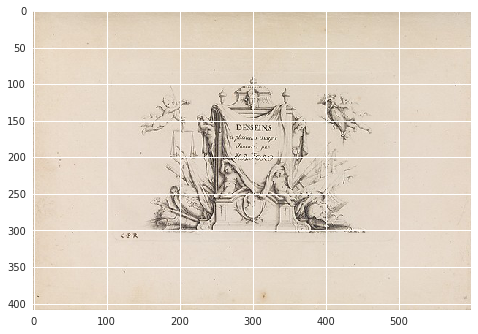

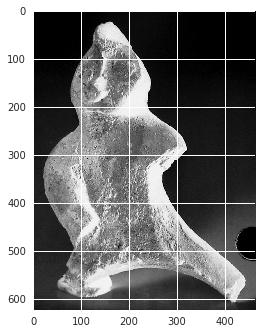

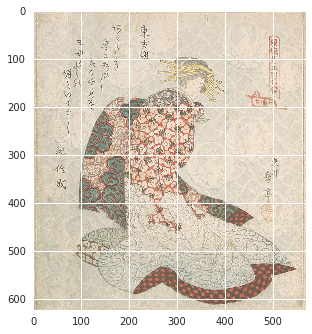

In [43]:
os.chdir('/home/yl2vq/PROJECT/met/logan/Primarysmall/Keras/train')
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [21]:
for img in os.listdir('./raw_data'):
  imgName = img.split('.')[0] # converts '0913209.jpg' --> '0913209'
  label = naming_dict[str(imgName)]
  counting_dict[label] += 1
  path = os.path.join('./raw_data', img)
  saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
  image_data = np.array(Image.open(path))
  imageio.imwrite(saveName, image_data)

FileNotFoundError: [Errno 2] No such file or directory: '207131.jpg'

In [31]:
naimg_dict = {} # id: breed
f = open("trainset.csv", "r")
fileContents = f.read()
fileContents = fileContents.split('\n')
for i in range(len(fileContents)-1):
  fileContents[i] = fileContents[i].split(',')
  naming_dict[fileContents[i][0]] = fileContents[i][1]

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 891: ordinal not in range(128)

In [7]:
trainurl = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Test1/train'
testurl = '/home/yl2vq/PROJECT/met/logan/Primarysmall/Test1/val'

In [8]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = np.load(trainurl)
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

FileNotFoundError: [Errno 2] No such file or directory: '/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/train/men'

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.7020 - acc: 0.8186
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3499 - acc: 0.9024
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3017 - acc: 0.9150
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2724 - acc: 0.9229
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2503 - acc: 0.9292


In [7]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.7019527752478918, 0.34986859509150187, 0.30165479287902514, 0.27235750506520273, 0.2502611064394315]
[0.8186166666666667, 0.9024333333333333, 0.9150166666666667, 0.92295, 0.9291833333333334]


In [8]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 17us/step
## evaluation loss and_metrics ##
[0.23711279204189778, 0.9318]


In [1]:
from __future__ import print_function

from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
import scipy
import argparse

from keras.applications import inception_v3
from keras import backend as K

parser = argparse.ArgumentParser(description='Deep Dreams with Keras.')
parser.add_argument('base_image_path', metavar='base', type=str,
                    help='Path to the image to transform.')
parser.add_argument('result_prefix', metavar='res_prefix', type=str,
                    help='Prefix for the saved results.')

args = parser.parse_args()
base_image_path = args.base_image_path
result_prefix = args.result_prefix

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
settings = {
    'features': {
        'mixed2': 0.2,
        'mixed3': 0.5,
        'mixed4': 2.,
        'mixed5': 1.5,
    },
}


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

K.set_learning_phase(0)

# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
dream = model.input
print('Model loaded.')

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    if layer_name not in layer_dict:
        raise ValueError('Layer ' + layer_name + ' not found in model.')
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        loss = loss + coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
    else:
        loss = loss + coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon())

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)


def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values


def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)


def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x


"""Process:

- Load the original image.
- Define a number of processing scales (i.e. image shapes),
    from smallest to largest.
- Resize the original image to the smallest scale.
- For every scale, starting with the smallest (i.e. current one):
    - Run gradient ascent
    - Upscale image to the next scale
    - Reinject the detail that was lost at upscaling time
- Stop when we are back to the original size.

To obtain the detail lost during upscaling, we simply
take the original image, shrink it down, upscale it,
and compare the result to the (resized) original image.
"""


# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 10.

img = preprocess_image(base_image_path)
if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

save_img(result_prefix + '.png', deprocess_image(np.copy(img)))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarn

ImportError: cannot import name 'save_img'